# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [94]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [95]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
lat=[]
lng =[]
Max_temp =[]
Humidity =[]
Cloudiness = []
Wind_Speed =[]
Country =[]
date =[]
city_name=[]

record = 1
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        print(f'Processing Record {record} | {city}')
        record= record +1
    except KeyError:
        print("city not available")
                        
                     

  
#print(json.dumps(response,indent=4,sort_keys=True))




Processing Record 1 | hamilton
Processing Record 2 | busselton
Processing Record 3 | ahipara
Processing Record 4 | ormara
Processing Record 5 | beaufort
Processing Record 6 | ust-kuyga
Processing Record 7 | hervey bay
Processing Record 8 | mataura
Processing Record 9 | grindavik
Processing Record 10 | constitucion
Processing Record 11 | puerto ayora
Processing Record 12 | punta arenas
Processing Record 13 | greenwood
Processing Record 14 | mar del plata
Processing Record 15 | baruun-urt
Processing Record 16 | kodiak
Processing Record 17 | qaanaaq
Processing Record 18 | port alfred
Processing Record 19 | rikitea
Processing Record 20 | richards bay
Processing Record 21 | carnarvon
Processing Record 22 | chokurdakh
Processing Record 23 | anloga
Processing Record 24 | kapuskasing
Processing Record 25 | pevek
Processing Record 26 | avarua
Processing Record 27 | cape town
Processing Record 28 | saskylakh
Processing Record 29 | isangel
Processing Record 30 | lagoa
Processing Record 31 | tasey

Processing Record 238 | prince rupert
Processing Record 239 | sept-iles
Processing Record 240 | nishihara
Processing Record 241 | iqaluit
Processing Record 242 | butaritari
Processing Record 243 | tasiilaq
Processing Record 244 | lamu
Processing Record 245 | general roca
Processing Record 246 | port hedland
Processing Record 247 | morondava
Processing Record 248 | maniitsoq
Processing Record 249 | darnah
Processing Record 250 | dawson
Processing Record 251 | san rafael
Processing Record 252 | yulara
Processing Record 253 | wanning
Processing Record 254 | gobabis
Processing Record 255 | port elizabeth
Processing Record 256 | coswig
Processing Record 257 | seoul
Processing Record 258 | cabo san lucas
Processing Record 259 | tshela
city not available
city not available
Processing Record 260 | dabat
Processing Record 261 | karratha
Processing Record 262 | mehamn
Processing Record 263 | kaitangata
Processing Record 264 | booue
Processing Record 265 | wanaka
Processing Record 266 | san patri

Processing Record 472 | fairlie
Processing Record 473 | teguise
Processing Record 474 | asadabad
Processing Record 475 | samarai
Processing Record 476 | kloulklubed
Processing Record 477 | gizo
Processing Record 478 | pitimbu
Processing Record 479 | risod
Processing Record 480 | kidodi
Processing Record 481 | nanchong
Processing Record 482 | kamenka
Processing Record 483 | laem sing
Processing Record 484 | ustyuzhna
Processing Record 485 | lazaro cardenas
Processing Record 486 | tromso
Processing Record 487 | saint-joseph
Processing Record 488 | gorele
Processing Record 489 | aden
Processing Record 490 | hobyo
city not available
Processing Record 491 | laguna de perlas
Processing Record 492 | beira
Processing Record 493 | marzuq
Processing Record 494 | leua
Processing Record 495 | nouakchott
Processing Record 496 | port blair
Processing Record 497 | ovre ardal
Processing Record 498 | moundou
Processing Record 499 | narsaq
Processing Record 500 | taldan
Processing Record 501 | missoula


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "Max_Temp":Max_temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "date":date   

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Hamilton,39.1834,-84.5333,16.11,41,90,5.14,US,1619207506
1,Busselton,-33.6500,115.3333,17.22,72,99,1.34,AU,1619207780
2,Ahipara,-35.1667,173.1667,16.74,79,45,4.45,NZ,1619207620
3,Ormara,25.2088,64.6357,27.46,76,0,5.14,PK,1619207780
4,Beaufort,5.3473,115.7455,27.00,89,20,1.25,MY,1619207781


In [97]:
weather_data.count()

city          562
lat           562
lng           562
Max_Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
date          562
dtype: int64

In [98]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [99]:
weather_data.dtypes

city           object
lat           float64
lng           float64
Max_Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
# there is no city where humiity is more than 100 % ion my weather data set

In [101]:
#  Get the indices of cities that have humidity over 100%.
weather_data[weather_data.Humidity > 100]

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date


In [102]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

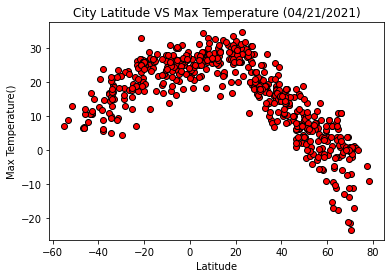

In [122]:

plt.scatter(weather_data["lat"], weather_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Max Temperature (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature()")
plt.savefig("../Images/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

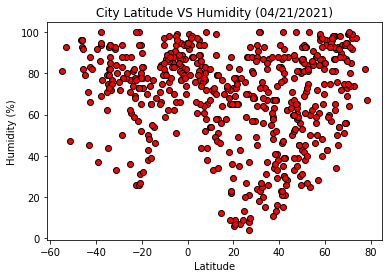

In [123]:
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Humidity (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

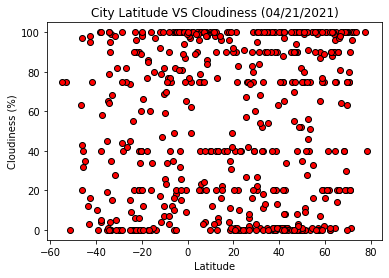

In [124]:
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Cloudiness (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

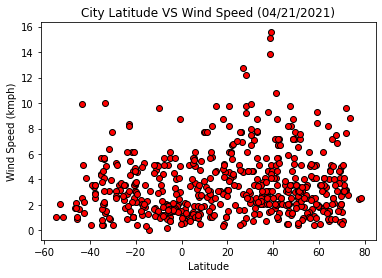

In [125]:
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude VS Wind Speed (04/21/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmph)")
plt.savefig("../Images/LatVsWindSpeed.png")
plt.show()

## Linear Regression

In [126]:
north_hemi = weather_data[weather_data["lat"]>0]
north_hemi.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Hamilton,39.1834,-84.5333,16.11,41,90,5.14,US,1619207506
3,Ormara,25.2088,64.6357,27.46,76,0,5.14,PK,1619207780
4,Beaufort,5.3473,115.7455,27.00,89,20,1.25,MY,1619207781
5,Ust-Kuyga,70.0167,135.6000,-21.34,99,100,1.47,RU,1619207781
8,Grindavik,63.8424,-22.4338,8.00,87,90,8.23,IS,1619207782


In [127]:
south_hemi = weather_data[weather_data["lat"]<0]

south_hemi.head()

,city,lat,lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,date
1,Busselton,-33.6500,115.3333,17.22,72,99,1.34,AU,1619207780
2,Ahipara,-35.1667,173.1667,16.74,79,45,4.45,NZ,1619207620
6,Hervey Bay,-25.2986,152.8535,15.56,77,74,3.60,AU,1619207781
7,Mataura,-46.1927,168.8643,6.67,96,43,1.79,NZ,1619207781
9,Constitución,-35.3333,-72.4167,16.48,62,0,4.39,CL,1619207682


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

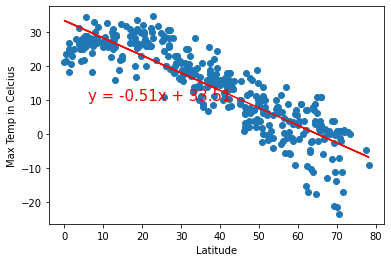

The R-Value is :-0.8776936107719568


In [128]:
x_values = north_hemi['lat']
y_values = north_hemi['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in Celcius')
plt.savefig("../Images/NorthernHemisphere-Max TempvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

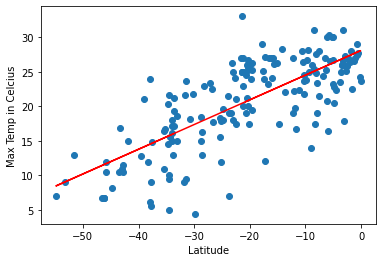

The R-Value is :0.7387728062238237


In [129]:
x_values = south_hemi['lat']
y_values = south_hemi['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in Celcius')
plt.savefig("../Images/SoputhernHemisphere-Max TempvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

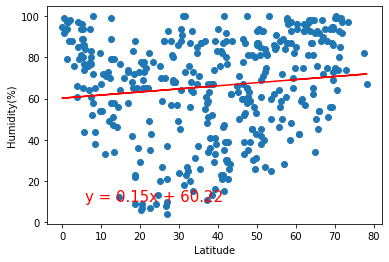

The R-Value is :0.12603376994753357


In [130]:
x_values = north_hemi['lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("../Images/NorthernHemisphere-HumidityvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

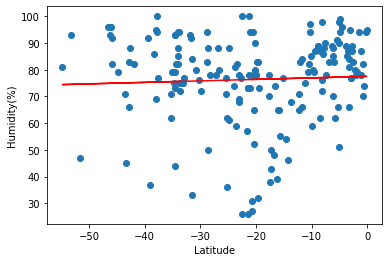

The R-Value is :0.046366556654136346


In [131]:
x_values = south_hemi['lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("../Images/southernernHemisphere-HumidityvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

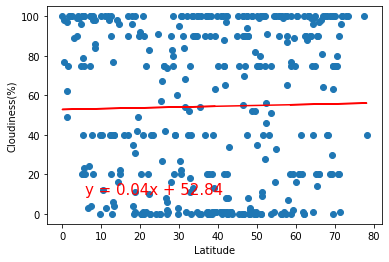

The R-Value is :0.020743247098382236


In [132]:
x_values = north_hemi['lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("../Images/NorthernHemisphere-cloudinessvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

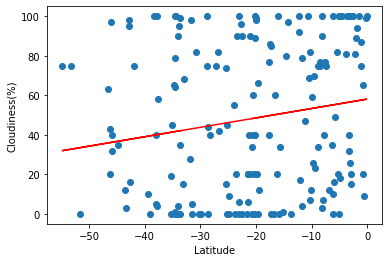

The R-Value is :0.17100115990247872


In [133]:
x_values = south_hemi['lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylabel('Cloudiness(%)')
plt.savefig("../Images/SouthernHemisphere-cloudinessvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

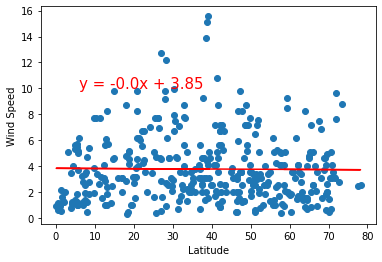

The R-Value is :-0.011095592482023582


In [134]:
x_values = north_hemi['lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../Images/NorthernHemisphere-windspeedvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

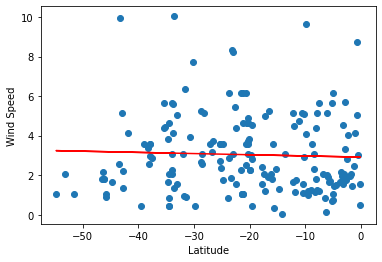

The R-Value is :-0.04074288495481848


In [135]:
x_values = south_hemi['lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../Images/SouthernHemisphere-windspeedvsLatitude.png")
plt.show()
print("The R-Value is :" + str(rvalue) )